# Introduction

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('Data/2018-personality-data.csv')
rating = pd.read_csv('Data/2018_ratings.csv')
print(data.shape)
print(rating.head())

(1834, 34)
                              useri   movie_id   rating                tstamp 
0  8e7cebf9a234c064b75016249f2ac65e          1      5.0   2001-09-10 17:19:56 
1  8e7cebf9a234c064b75016249f2ac65e          2      4.0   2001-09-28 11:34:55 
2  8e7cebf9a234c064b75016249f2ac65e          3      4.0   2001-09-28 11:42:50 
3  8e7cebf9a234c064b75016249f2ac65e          5      5.0   2001-09-28 11:27:30 
4  8e7cebf9a234c064b75016249f2ac65e          6      4.0   2002-01-07 18:12:02 


In [2]:
# Check for missing values
data.isna().sum()
# No missing value! Good News!

userid                  0
 openness               0
 agreeableness          0
 emotional_stability    0
 conscientiousness      0
 extraversion           0
 assigned metric        0
 assigned condition     0
 movie_1                0
 predicted_rating_1     0
 movie_2                0
 predicted_rating_2     0
 movie_3                0
 predicted_rating_3     0
 movie_4                0
 predicted_rating_4     0
 movie_5                0
 predicted_rating_5     0
 movie_6                0
 predicted_rating_6     0
 movie_7                0
 predicted_rating_7     0
 movie_8                0
 predicted_rating_8     0
 movie_9                0
 predicted_rating_9     0
 movie_10               0
 predicted_rating_10    0
 movie_11               0
 predicted_rating_11    0
 movie_12               0
 predicted_rating_12    0
 is_personalized        0
 enjoy_watching         0
dtype: int64

In [3]:
data.columns

Index(['userid', ' openness', ' agreeableness', ' emotional_stability',
       ' conscientiousness', ' extraversion', ' assigned metric',
       ' assigned condition', ' movie_1', ' predicted_rating_1', ' movie_2',
       ' predicted_rating_2', ' movie_3', ' predicted_rating_3', ' movie_4',
       ' predicted_rating_4', ' movie_5', ' predicted_rating_5', ' movie_6',
       ' predicted_rating_6', ' movie_7', ' predicted_rating_7', ' movie_8',
       ' predicted_rating_8', ' movie_9', ' predicted_rating_9', ' movie_10',
       ' predicted_rating_10', ' movie_11', ' predicted_rating_11',
       ' movie_12', ' predicted_rating_12', ' is_personalized',
       ' enjoy_watching '],
      dtype='object')

In [4]:
#drop the features which cannot be used as the predictors to classify the "enjoy_watching".
#since we cannot use the predicted_rating to predict another column.
data = data.drop(columns = [' movie_1', ' movie_2', ' movie_3',' movie_4', ' movie_5',
                             ' movie_6', ' movie_7', ' movie_8', ' movie_9', ' movie_10', ' movie_11',
                            ' movie_12','userid'])
data.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,predicted_rating_1,predicted_rating_2,predicted_rating_3,...,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4.410466,4.271995,4.611922,...,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847,4,4
1,7.0,4.0,6.0,5.5,4.0,all,default,4.207280,4.266540,4.211322,...,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877,2,3
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,4.868064,4.710444,5.029360,...,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990,2,2
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,4.526371,4.456451,4.668444,...,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,3,3
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,4.526371,4.456451,4.668444,...,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,2,3


In [5]:
#remove the space before and after the meaningful names
data_new = data.rename(columns={' openness' : 'openness',
                            ' agreeableness' : 'agreeableness',
                            ' emotional_stability' : 'emotional_stability',
                            ' conscientiousness' : 'conscientiousness',
                            ' extraversion' : 'extraversion',
                            ' assigned metric' : 'assigned metric',
                            ' assigned condition' : 'assigned condition',
                            ' is_personalized' : 'is_personalized',
                            ' enjoy_watching ' : 'enjoy_watching'})
data_new

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,predicted_rating_1,predicted_rating_2,predicted_rating_3,...,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4.410466,4.271995,4.611922,...,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847,4,4
1,7.0,4.0,6.0,5.5,4.0,all,default,4.207280,4.266540,4.211322,...,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877,2,3
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,4.868064,4.710444,5.029360,...,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990,2,2
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,4.526371,4.456451,4.668444,...,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,3,3
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,4.526371,4.456451,4.668444,...,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,popularity,low,4.246346,4.002232,3.981009,...,3.888507,4.368495,4.554531,4.145526,4.409108,3.960470,4.178546,4.085300,3,3
1830,4.0,3.5,4.5,4.0,2.5,serendipity,high,4.227140,4.069527,4.336292,...,4.217929,4.101192,4.244278,4.473696,4.149697,4.116152,4.155210,4.045751,3,4
1831,6.0,3.0,5.5,3.5,6.0,serendipity,low,3.935297,4.006561,3.947412,...,4.002666,4.235115,4.191760,3.965657,3.998642,4.144870,3.860041,3.899857,3,4
1832,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4.241766,4.350788,4.399071,...,4.493639,4.397887,4.207513,4.212995,4.819710,4.059369,4.427336,4.844386,4,4


## EDA

In [6]:
data_new['sum_ratings'] = data_new[' predicted_rating_1'] + data_new[' predicted_rating_2'] + data_new[' predicted_rating_3'] + data_new[' predicted_rating_4'] + data_new[' predicted_rating_5'] + data_new[' predicted_rating_6'] +data_new[' predicted_rating_7'] + data_new[' predicted_rating_8'] +data_new[' predicted_rating_9'] + data_new[' predicted_rating_10'] + data_new[' predicted_rating_11'] + data_new[' predicted_rating_12']
data_new['avg_ratings'] = (data_new['sum_ratings'])/12
data_new = data_new.drop(columns = [' predicted_rating_1', ' predicted_rating_2', ' predicted_rating_3',' predicted_rating_4', 
                                    ' predicted_rating_5', ' predicted_rating_6', ' predicted_rating_7', ' predicted_rating_8', 
                                    ' predicted_rating_9', ' predicted_rating_10', ' predicted_rating_11',' predicted_rating_12','sum_ratings'])
# It is reasonable to separate the "enjoy_watching" to be enjoyable/not enjoyable based on score 4
for i in list(range(0,len(data_new))):
    if data_new['enjoy_watching'][i] >= 4:
         data_new['enjoy_watching'][i] = 'Enjoyable'
    else:
        data_new['enjoy_watching'][i] = 'Not Enjoyable'

<ipython-input-6-660cf5ac8d26>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 'Enjoyable'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-6-660cf5ac8d26>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 'Not Enjoyable'


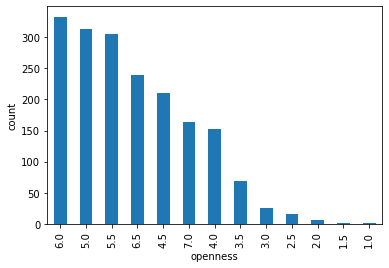

None
6.0    333
5.0    313
5.5    305
6.5    239
4.5    210
7.0    163
4.0    152
3.5     69
3.0     25
2.5     16
2.0      6
1.5      2
1.0      1
Name: openness, dtype: int64


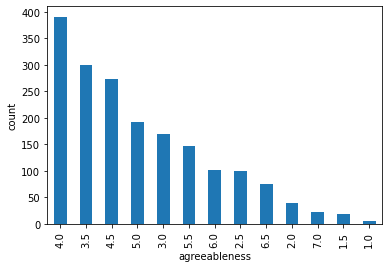

None
4.0    391
3.5    299
4.5    273
5.0    193
3.0    170
5.5    146
6.0    101
2.5    100
6.5     76
2.0     39
7.0     22
1.5     18
1.0      6
Name: agreeableness, dtype: int64


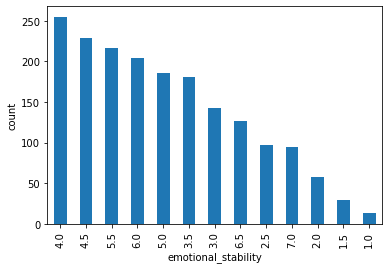

None
4.0    255
4.5    229
5.5    217
6.0    204
5.0    186
3.5    181
3.0    143
6.5    127
2.5     97
7.0     95
2.0     58
1.5     29
1.0     13
Name: emotional_stability, dtype: int64


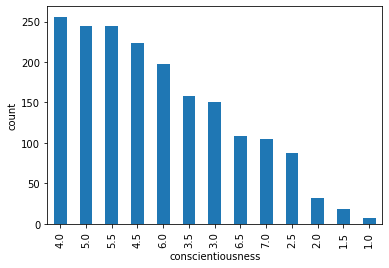

None
4.0    256
5.0    245
5.5    245
4.5    224
6.0    197
3.5    158
3.0    150
6.5    109
7.0    105
2.5     88
2.0     32
1.5     18
1.0      7
Name: conscientiousness, dtype: int64


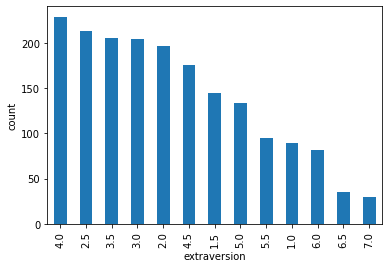

None
4.0    229
2.5    213
3.5    205
3.0    204
2.0    197
4.5    176
1.5    145
5.0    134
5.5     95
1.0     89
6.0     82
6.5     35
7.0     30
Name: extraversion, dtype: int64


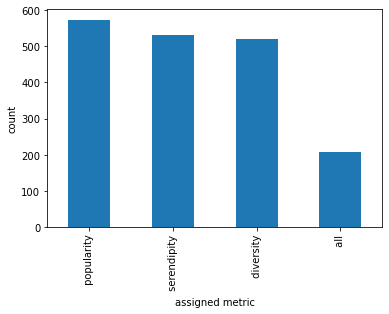

None
 popularity     574
 serendipity    532
 diversity      520
 all            208
Name: assigned metric, dtype: int64


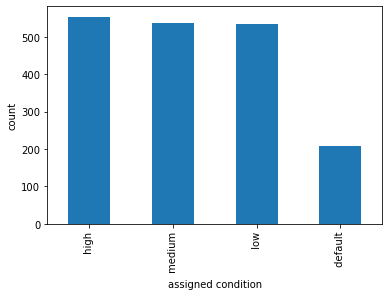

None
 high       554
 medium     538
 low        534
 default    208
Name: assigned condition, dtype: int64


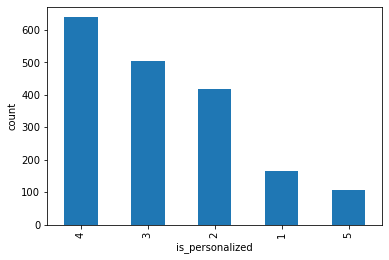

None
4    639
3    506
2    419
1    164
5    106
Name: is_personalized, dtype: int64


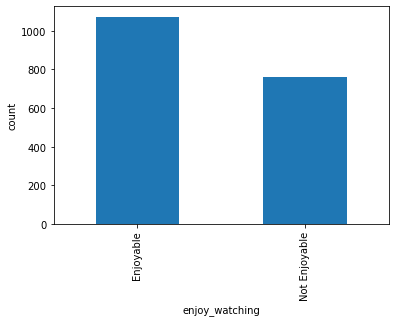

None
Enjoyable        1074
Not Enjoyable     760
Name: enjoy_watching, dtype: int64


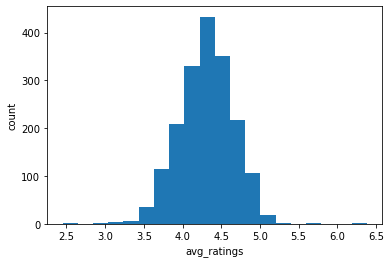

None
count    1834.000000
mean        4.308367
std         0.351084
min         2.449466
25%         4.077668
50%         4.322753
75%         4.535197
max         6.381593
Name: avg_ratings, dtype: float64


In [7]:
#Implement value_counts for all categorical variables (all variables are categorical)
#make bar plots for all variables
import matplotlib
import sklearn as sk
from matplotlib import pylab as plt

a = list(range(0,len(data_new.columns)))
for i in a:
    if data_new.columns[i] != 'avg_ratings' :
        pd.value_counts(data_new.iloc[:,i]).plot.bar()
        plt.xlabel(data_new.columns[i])
        plt.ylabel('count')
        print(plt.show())
        print(pd.value_counts(data_new.iloc[:,i]))
    else:
        data_new.iloc[:,i].plot.hist(bins = 20)
        plt.xlabel(data_new.columns[i])
        plt.ylabel('count')
        print(plt.show())
        print(data_new.iloc[:,i].describe())

In [8]:
# combine two columns based on the data description
#data = data.drop(columns = [' assigned metric', ' assigned condition'])
data_new.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching,avg_ratings
0,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,Enjoyable,4.252363
1,7.0,4.0,6.0,5.5,4.0,all,default,2,Not Enjoyable,4.173935
2,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,Not Enjoyable,4.764654
3,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,Not Enjoyable,4.444313
4,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,Not Enjoyable,4.444313


conscientiousness         1.0       1.5       2.0       2.5       3.0  \
emotional_stability                                                     
1.0                       NaN  0.076923  0.076923  0.307692       NaN   
1.5                  0.034483  0.034483  0.034483  0.137931  0.206897   
2.0                  0.017241  0.068966  0.017241  0.155172  0.120690   
2.5                       NaN  0.010309  0.010309  0.103093  0.154639   
3.0                       NaN  0.020979  0.006993  0.083916  0.146853   
3.5                  0.011050  0.005525  0.038674  0.044199  0.104972   
4.0                  0.007843       NaN  0.023529  0.031373  0.082353   
4.5                       NaN  0.017467  0.021834  0.026201  0.082969   
5.0                       NaN       NaN  0.026882  0.021505  0.064516   
5.5                       NaN  0.009217  0.004608  0.032258  0.036866   
6.0                  0.004902  0.004902  0.014706  0.034314  0.049020   
6.5                       NaN       NaN       NaN  

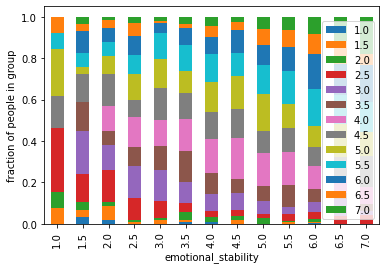

In [9]:
count_matrix = data_new.groupby(['emotional_stability', 'conscientiousness']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
#plt.show()
plt.savefig('emotionfrac.png',dpi=300)

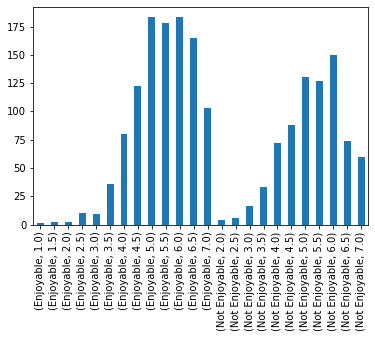

In [10]:
dx = data_new
data_group = dx.groupby(['enjoy_watching', 'openness']).size()
data_group.plot.bar()
plt.xlabel('')
plt.savefig("enjoy_openness.png",dpi=300)

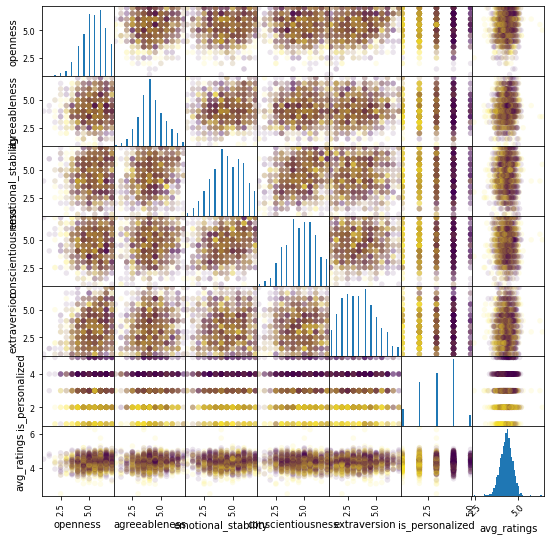

In [11]:
pd.plotting.scatter_matrix(data_new, figsize=(9, 9), marker='o', c = pd.get_dummies(data_new['enjoy_watching']).iloc[:,1],
                           hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.xticks(rotation=45)
plt.savefig("matrix.png",dpi=300)

enjoy_watching  Enjoyable  Not Enjoyable
agreeableness                           
1.0              0.333333       0.666667
1.5              0.555556       0.444444
2.0              0.641026       0.358974
2.5              0.550000       0.450000
3.0              0.570588       0.429412
3.5              0.575251       0.424749
4.0              0.562660       0.437340
4.5              0.604396       0.395604
5.0              0.590674       0.409326
5.5              0.589041       0.410959
6.0              0.643564       0.356436
6.5              0.618421       0.381579
7.0              0.727273       0.272727


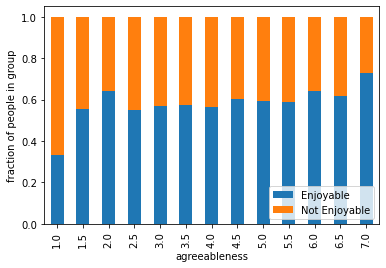

In [12]:
count_matrix = data_new.groupby(['agreeableness', 'enjoy_watching']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.savefig("agree_enjoy.png",dpi=300)

enjoy_watching   Enjoyable  Not Enjoyable
assigned metric                          
 all              0.625000       0.375000
 diversity        0.601923       0.398077
 popularity       0.552265       0.447735
 serendipity      0.590226       0.409774


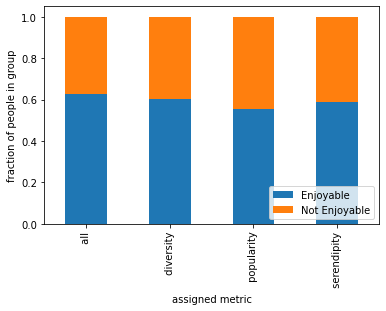

In [13]:
count_matrix = data_new.groupby(['assigned metric', 'enjoy_watching']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.savefig("metric_enjoy.png",dpi=300)

The above figure shows the relationship between the assessment scores of agreeableness
(1-NOT have such a tendency 7-have such a tendency) and the fraction of the people in the
group which feel the movies in the list are enjoyable/not enjoyable. The interesting thing is
that the personalities of agreeableness seems to have very weak correlation with our target
variable. As I expected, the more agreeableness, the larger proportion of that they believe
the list is enjoyable. However, Almost each group, besides agreeableness-1 and 7, have
pretty similar levels/proportions of views of the movies.

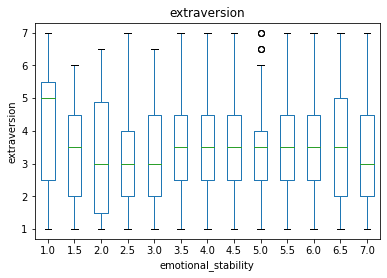

In [14]:

data_new[['emotional_stability','extraversion']].boxplot(by='emotional_stability',grid=False)
plt.ylabel('extraversion')
plt.xlabel('emotional_stability')
plt.suptitle('')
plt.savefig("emotion_extraversion.png",dpi=300)

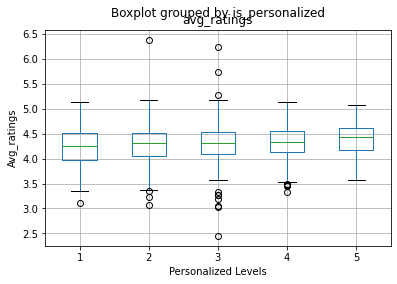

In [15]:
data_new[['avg_ratings','is_personalized']].boxplot(by='is_personalized')
plt.ylabel('Avg_ratings')
plt.xlabel('Personalized Levels')
plt.savefig("person_rating.png",dpi=300)

### Data Preprocessing

In [16]:
data_new = data.rename(columns={' openness' : 'openness',
                            ' agreeableness' : 'agreeableness',
                            ' emotional_stability' : 'emotional_stability',
                            ' conscientiousness' : 'conscientiousness',
                            ' extraversion' : 'extraversion',
                            ' assigned metric' : 'assigned metric',
                            ' assigned condition' : 'assigned condition',
                            ' is_personalized' : 'is_personalized',
                            ' enjoy_watching ' : 'enjoy_watching'})

data_new['sum_ratings'] = data_new[' predicted_rating_1'] + data_new[' predicted_rating_2'] + data_new[' predicted_rating_3'] + data_new[' predicted_rating_4'] + data_new[' predicted_rating_5'] + data_new[' predicted_rating_6'] +data_new[' predicted_rating_7'] + data_new[' predicted_rating_8'] +data_new[' predicted_rating_9'] + data_new[' predicted_rating_10'] + data_new[' predicted_rating_11'] + data_new[' predicted_rating_12']
data_new['avg_ratings'] = (data_new['sum_ratings'])/12
data_new = data_new.drop(columns = [' predicted_rating_1', ' predicted_rating_2', ' predicted_rating_3',' predicted_rating_4', 
                                    ' predicted_rating_5', ' predicted_rating_6', ' predicted_rating_7', ' predicted_rating_8', 
                                    ' predicted_rating_9', ' predicted_rating_10', ' predicted_rating_11',' predicted_rating_12','sum_ratings'])

for i in list(range(0,len(data_new))):
    if data_new['enjoy_watching'][i] >= 4:
         data_new['enjoy_watching'][i] = 0
    else:
        data_new['enjoy_watching'][i] = 1

<ipython-input-16-63302ce5d6aa>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 0
<ipython-input-16-63302ce5d6aa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['enjoy_watching'][i] = 1


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder,MinMaxScaler
# Preprocess 
ordinal_ftrs = ['openness','agreeableness','emotional_stability','conscientiousness',
                'extraversion','is_personalized','assigned condition'] #Ranked categorical
ordinal_cats = [[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0],
               [1,2,3,4,5],
               [' default', ' low', ' medium', ' high']]
minmax_ftrs = ['avg_ratings']
onehot_ftrs = ['assigned metric']


onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
ord_transformer = Pipeline(steps=[('ord', OrdinalEncoder(categories = ordinal_cats))]) 
minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_ftrs),
        ('ord', ord_transformer, ordinal_ftrs),
        ('minmax',minmax_transformer , minmax_ftrs)])

## Cross Validation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = data_new.loc[:, data_new.columns != 'enjoy_watching']
y = data_new['enjoy_watching']


random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

stkf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in stkf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_CV = X_other.iloc[val_index]
    y_CV = y_other.iloc[val_index]
    
    df_train = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.transformers_[1][-1] + \
        list(preprocessor.named_transformers_['onehot'][-1].get_feature_names(onehot_ftrs)) + \
        preprocessor.transformers_[2][-1]
    df_train = pd.DataFrame(data=df_train,columns=feature_names)
    df_CV = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)
    


In [47]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
import math
def MLpipe_Stkf_Acc(X,y,ML_algo,param_grid):
    
    test_scores = []
    best_models = []

    for i in range(0,10):
        
        random_state = 21 * i 
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
        stkf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
        
        pipe = make_pipeline(preprocessor,ML_algo)
        grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy', cv=stkf, n_jobs=-1, return_train_score = True)
        grid.fit(X_other, y_other)
        
        test_score = grid.score(X_test, y_test)
        test_scores.append(test_score)
        best_models.append(grid.best_params_)     
    return best_models, test_scores

## Results

In [20]:
from sklearn.linear_model import LogisticRegression
param_grid = {'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
             'logisticregression__penalty':['l1','l2'],
             'logisticregression__C':[100, 10, 1.0, 0.1, 0.01],
             'logisticregression__max_iter':[10000000000]}
ML_algo = LogisticRegression()
models_lr, scores_lr = MLpipe_Stkf_Acc(X,y,ML_algo,param_grid)
print(scores_lr)

[0.7520435967302452, 0.7983651226158038, 0.771117166212534, 0.7656675749318801, 0.771117166212534, 0.7547683923705722, 0.7574931880108992, 0.7602179836512262, 0.7520435967302452, 0.784741144414169]


In [61]:
from sklearn.svm import SVC
# the SVC returns a different best model for each run and we cannot find the best combination of parameters.
param_grid = {'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'svc__C':[100, 10, 1.0, 0.1, 0.01]}
ML_algo = SVC()
models_svc, scores_svc = MLpipe_Stkf_Acc(X,y,ML_algo,param_grid)
print(scores_svc)

[0.7438692098092643, 0.7901907356948229, 0.7411444141689373, 0.7356948228882834, 0.7683923705722071, 0.7438692098092643, 0.7574931880108992, 0.7356948228882834, 0.7493188010899182, 0.782016348773842]


In [55]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'randomforestclassifier__n_estimators': [1,10,30,50,100,150],
             'randomforestclassifier__max_depth':np.linspace(1,10,num=5),
             'randomforestclassifier__min_samples_split': [2, 5, 10],
             'randomforestclassifier__max_features': ['sqrt','log2',9]}
ML_algo = RandomForestClassifier()
models_rfc, scores_rfc = MLpipe_Stkf_Acc(X,y,ML_algo,param_grid)
print(scores_rfc)

[0.7493188010899182, 0.8038147138964578, 0.7520435967302452, 0.7547683923705722, 0.7629427792915532, 0.7520435967302452, 0.7411444141689373, 0.7683923705722071, 0.7656675749318801, 0.8038147138964578]


In [56]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'kneighborsclassifier__n_neighbors': [1,10,30,50,100],
              'kneighborsclassifier__leaf_size': [5,10,20,30,40],
              'kneighborsclassifier__p':[1,2],
              'kneighborsclassifier__weights': ['uniform', 'distance']}
ML_algo = KNeighborsClassifier()
models_knnc, scores_knnc = MLpipe_Stkf_Acc(X,y,ML_algo,param_grid)
print(scores_knnc)

[0.7438692098092643, 0.7656675749318801, 0.7356948228882834, 0.7029972752043597, 0.7166212534059946, 0.6975476839237057, 0.7438692098092643, 0.7520435967302452, 0.7411444141689373, 0.771117166212534]


In [69]:
import statistics
baseline_acc = y_test.value_counts()[0]/len(y_test)
lr_acc = scores_lr[2]
print("Baseline Accuracy:", baseline_acc )
print("Mean Logistic Accuracy:", np.mean(scores_lr), "STD:", statistics.stdev(scores_lr))
print("Mean RFC Accuracy:", np.mean(scores_rfc), "STD:", statistics.stdev(scores_rfc))
print("Mean SVC Accuracy:", np.mean(scores_svc), "STD:",statistics.stdev(scores_svc))
print("Mean KNNC Accuracy:", np.mean(scores_knnc),"STD:",statistics.stdev(scores_knnc))
print("Best Logistic Model Improvement:", (lr_acc - baseline_acc)/ baseline_acc)

Baseline Accuracy: 0.6130790190735694
Mean Logistic Accuracy: 0.7667574931880109 STD: 0.01515469835757618
Mean RFC Accuracy: 0.7653950953678474 STD: 0.021815388448226808
Mean SVC Accuracy: 0.7547683923705722 STD: 0.01935265735936651
Mean KNNC Accuracy: 0.7370572207084468 STD: 0.024615495427552484
Best Logistic Model Improvement: 0.25777777777777783


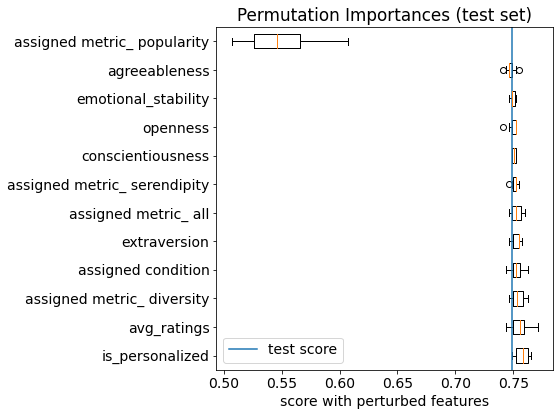

In [90]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
clf_lr = LogisticRegression(C=100,max_iter=10000000000,penalty='l2',solver='newton-cg').fit(df_train,y_train)
res_lr = permutation_importance(clf_lr,df_test,y_test,n_repeats=10,random_state=0, scoring='accuracy')
y_test_pred = clf_lr.predict(df_test)
test_score = accuracy_score(y_test,y_test_pred)
scores = np.zeros([len(feature_names),10])

for i in range(len(feature_names)):
    acc_scores = []
    for j in range(10):
        X_test_shuffled = df_test.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(df_test[feature_names[i]].values)
        y_test_pred = clf_lr.predict(X_test_shuffled)
        acc_scores.append(accuracy_score(y_test,y_test_pred))
    scores[i] = acc_scores


sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=np.array(feature_names)[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed features')
plt.legend()
plt.tight_layout()
plt.savefig("Importances.png",dpi=300)

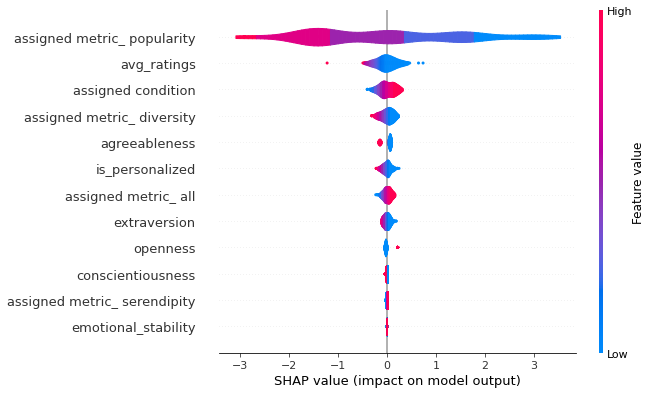

In [93]:
import shap
np.random.seed(0)
shap.initjs()
explainer_lr = shap.LinearExplainer(clf_lr,df_train)
shap_values = explainer_lr.shap_values(df_test)
shap.summary_plot(shap_values, df_test, feature_names = feature_names,plot_type="violin")

In [67]:
X_test_transformed = preprocessor.transform(X_test)
index_100 = 100
shap_test = np.array(df_test)
shap.force_plot(explainer_lr.expected_value, shap_values[100,:], features = X_test_transformed[100,:],feature_names = feature_names)

In [68]:
index_200 = 200
shap_test = np.array(df_test)
shap.force_plot(explainer_lr.expected_value, shap_values[index_200 ,:], features = X_test_transformed[index_200 ,:],feature_names = feature_names)

In [69]:
index_300 = 300
shap.force_plot(explainer_lr.expected_value, shap_values[index_300 ,:], features = X_test_transformed[index_300 ,:],feature_names = feature_names)

In [68]:
#save models
import pickle
# models and accuracy scores
pickle.dump((models_lr[2]),open('lr_model.sav','wb'))
pickle.dump((models_rfc[3]),open('rfc_model.sav','wb'))
pickle.dump((models_knnc[1]),open('knnc_model.sav','wb'))

In [105]:
# splitted datasets
pickle.dump((X_train,y_train,X_CV,y_CV,X_test,y_test),open('data_original.sav','wb'))
pickle.dump((df_train,df_CV,df_test),open('data_preprocess.sav','wb'))